In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [3]:
plt.rcParams["figure.dpi"] = 200

# Imaging data

In [4]:
imaging_filepath = Path("../data/20230831/FOV2/Raster_2D_FOV2_5min_20230831_145108_DMD1_registered_affine_traces.csv")
traces = pd.read_csv(imaging_filepath)
traces

,Time,ROI1,ROI2,ROI3,ROI4,ROI5,ROI6,ROI7,ROI8,ROI9,ROI10,ROI11
0,0.000000,-0.028352,-0.100885,-0.100580,-0.065051,-0.111336,0.020119,-0.028847,-0.004651,-0.072434,-0.103763,0.039575
1,0.052817,-0.047995,-0.102054,-0.061720,-0.073511,-0.079654,-0.024152,-0.032898,-0.058473,-0.071313,-0.089285,0.016887
2,0.105634,-0.003443,-0.097973,-0.046748,-0.030860,-0.069923,-0.007214,-0.033580,0.016638,-0.038343,-0.071907,0.020802
3,0.158451,0.008819,-0.102322,-0.026106,-0.044116,-0.064644,0.005765,-0.023047,-0.006796,-0.032812,-0.090923,0.023186
4,0.211268,-0.025409,-0.113479,-0.041547,-0.020993,-0.064552,0.006502,0.003464,-0.019102,0.016795,-0.068630,0.020253
...,...,...,...,...,...,...,...,...,...,...,...,...
5675,299.735915,0.249147,-0.029992,-0.101363,-0.030357,0.069515,-0.025687,-0.009074,0.040878,-0.011594,0.007665,0.075140
5676,299.788732,0.176167,-0.102638,-0.138361,-0.052668,0.029446,-0.031947,-0.040960,0.047691,-0.035177,-0.006925,0.029961
5677,299.841549,0.180985,-0.112253,-0.126036,-0.064335,0.030195,-0.011789,-0.024500,0.014431,-0.023909,-0.016317,0.200946
5678,299.894366,0.182701,-0.071266,-0.043268,0.037045,0.119741,0.077064,0.010088,0.102342,0.122129,0.158864,0.306499


# Behavior data

In [5]:
behavior_filepath = Path("../data/20230831/behavior_selected_data/20230831_WT1_stage3_150_170cm_Image_Test_300_1.csv")
behavior = pd.read_csv(behavior_filepath)
behavior

,Trial_number,Time,Speed,Distance,Licking_count,Trial failed,Trail success,SLAP2_acquiring
0,25,0.0,0.0,0.16,18.0,0.0,25.0,1.0
1,25,33.0,0.0,0.16,18.0,0.0,25.0,1.0
2,25,64.0,0.0,0.16,18.0,0.0,25.0,1.0
3,25,97.0,0.0,0.16,18.0,0.0,25.0,1.0
4,25,129.0,0.0,0.16,18.0,0.0,25.0,1.0
...,...,...,...,...,...,...,...,...
8990,39,299395.0,0.0,1.15,18.0,1.0,38.0,1.0
8991,39,299428.0,0.0,1.15,18.0,1.0,38.0,1.0
8992,39,299459.0,0.0,1.15,18.0,1.0,38.0,1.0
8993,39,299492.0,0.0,1.15,18.0,1.0,38.0,1.0


In [6]:
lick_timing_continuous = (behavior["Licking_count"] - behavior["Licking_count"].shift()) == 1
lick_timing_discrete = behavior[lick_timing_continuous]["Time"] / 1000

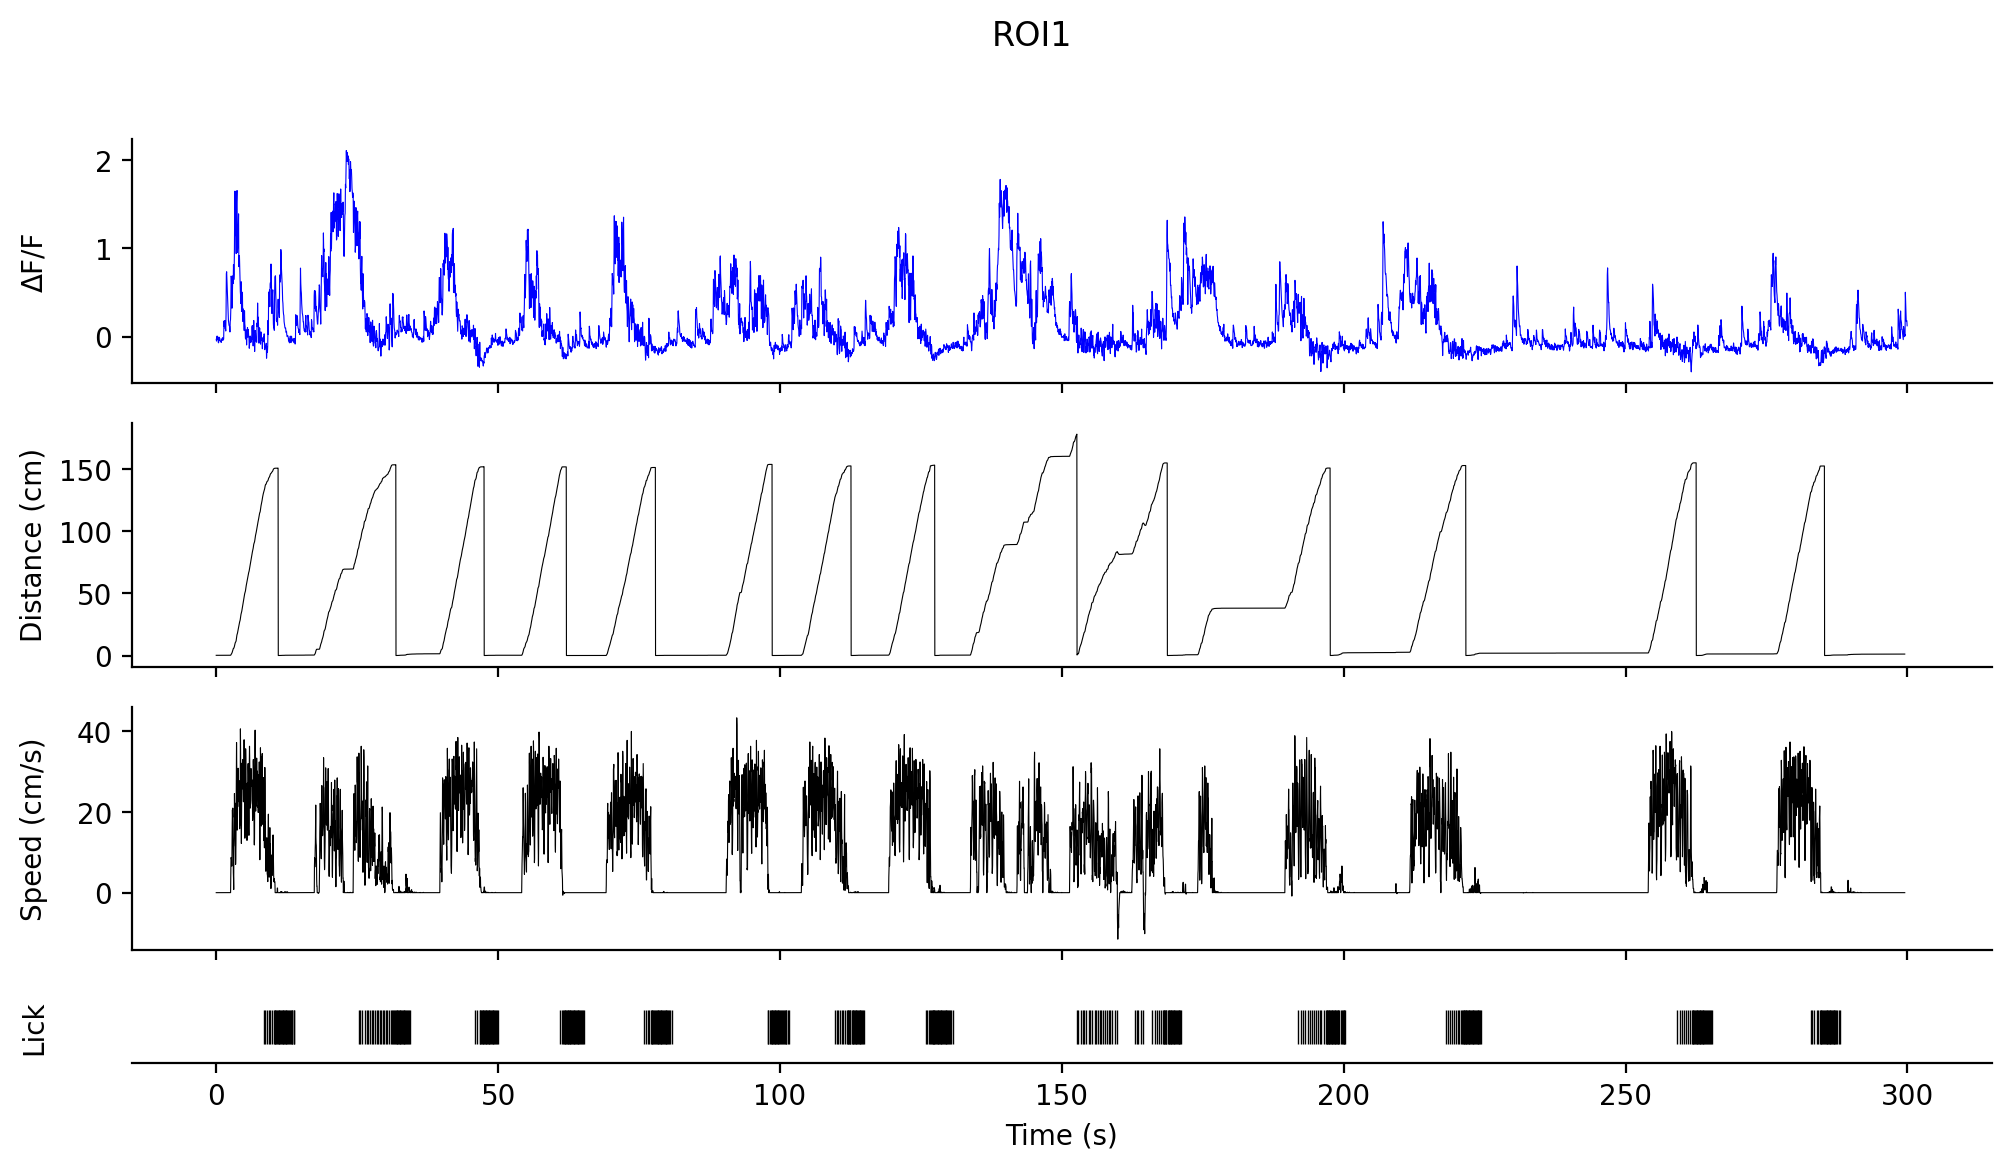

In [7]:
roi = "ROI1"

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 6), gridspec_kw={"height_ratios": [1, 1, 1, 0.3]})

axes[0].plot(traces["Time"], traces[roi], lw=0.4, color="blue")
axes[1].plot(behavior["Time"] / 1000, behavior["Distance"], lw=0.4, color="black")
axes[2].plot(behavior["Time"] / 1000, behavior["Speed"], lw=0.4, color="black")
# axes[3].plot(behavior["Time"] / 1000, lick_timing_continuous, lw=0.5, color="black")
axes[3].eventplot(lick_timing_discrete, lw=0.5, color="black")

axes[0].set_ylabel("ΔF/F")
axes[1].set_ylabel("Distance (cm)")
axes[2].set_ylabel("Speed (cm/s)")
axes[3].set_ylabel("Lick")

axes[0].spines[["right", "top"]].set_visible(False)
axes[1].spines[["right", "top"]].set_visible(False)
axes[2].spines[["right", "top"]].set_visible(False)
axes[3].spines[["left", "right", "top"]].set_visible(False)
axes[3].set_yticks([])

plt.xlabel("Time (s)")
fig.suptitle(roi)

fig.align_ylabels(axes)

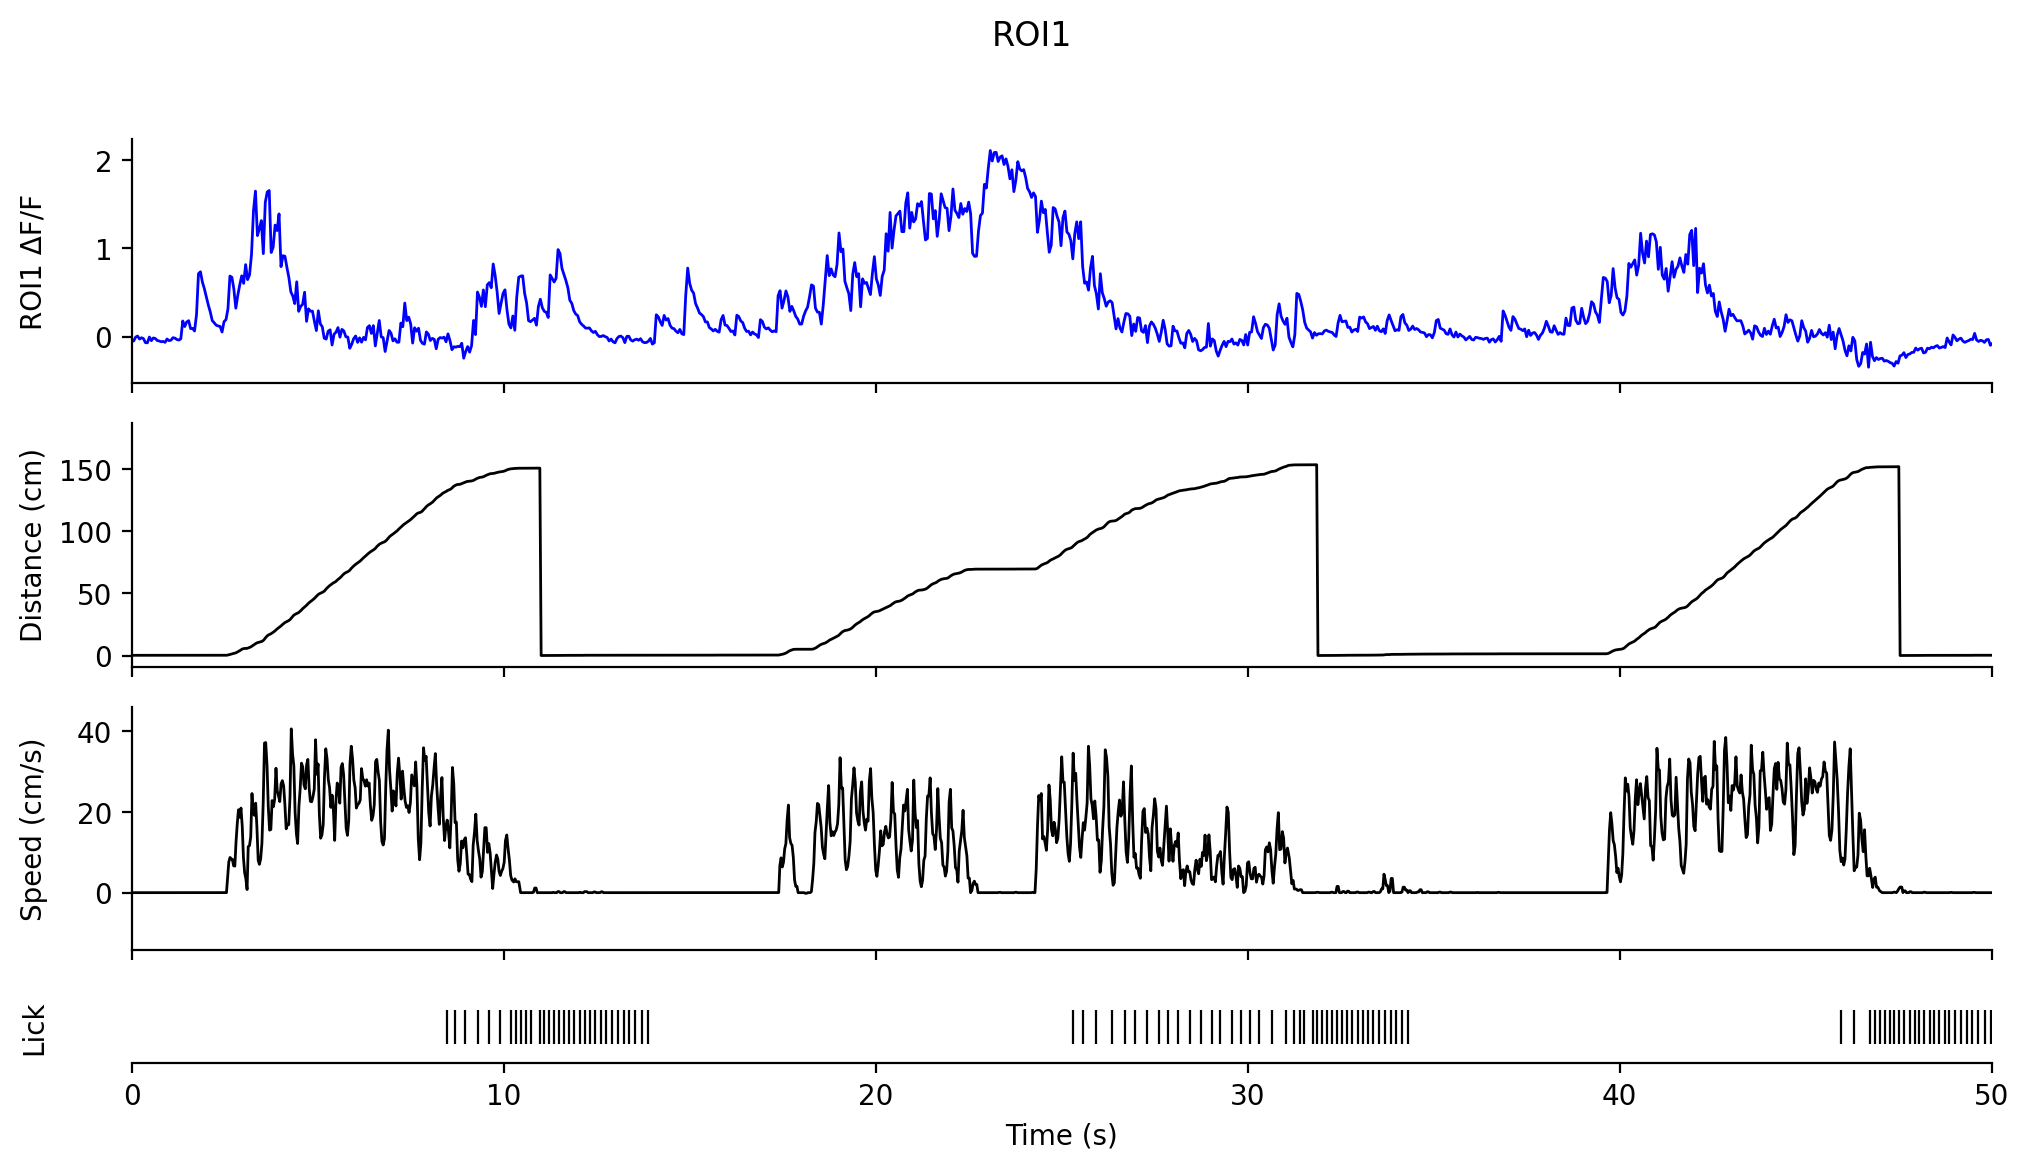

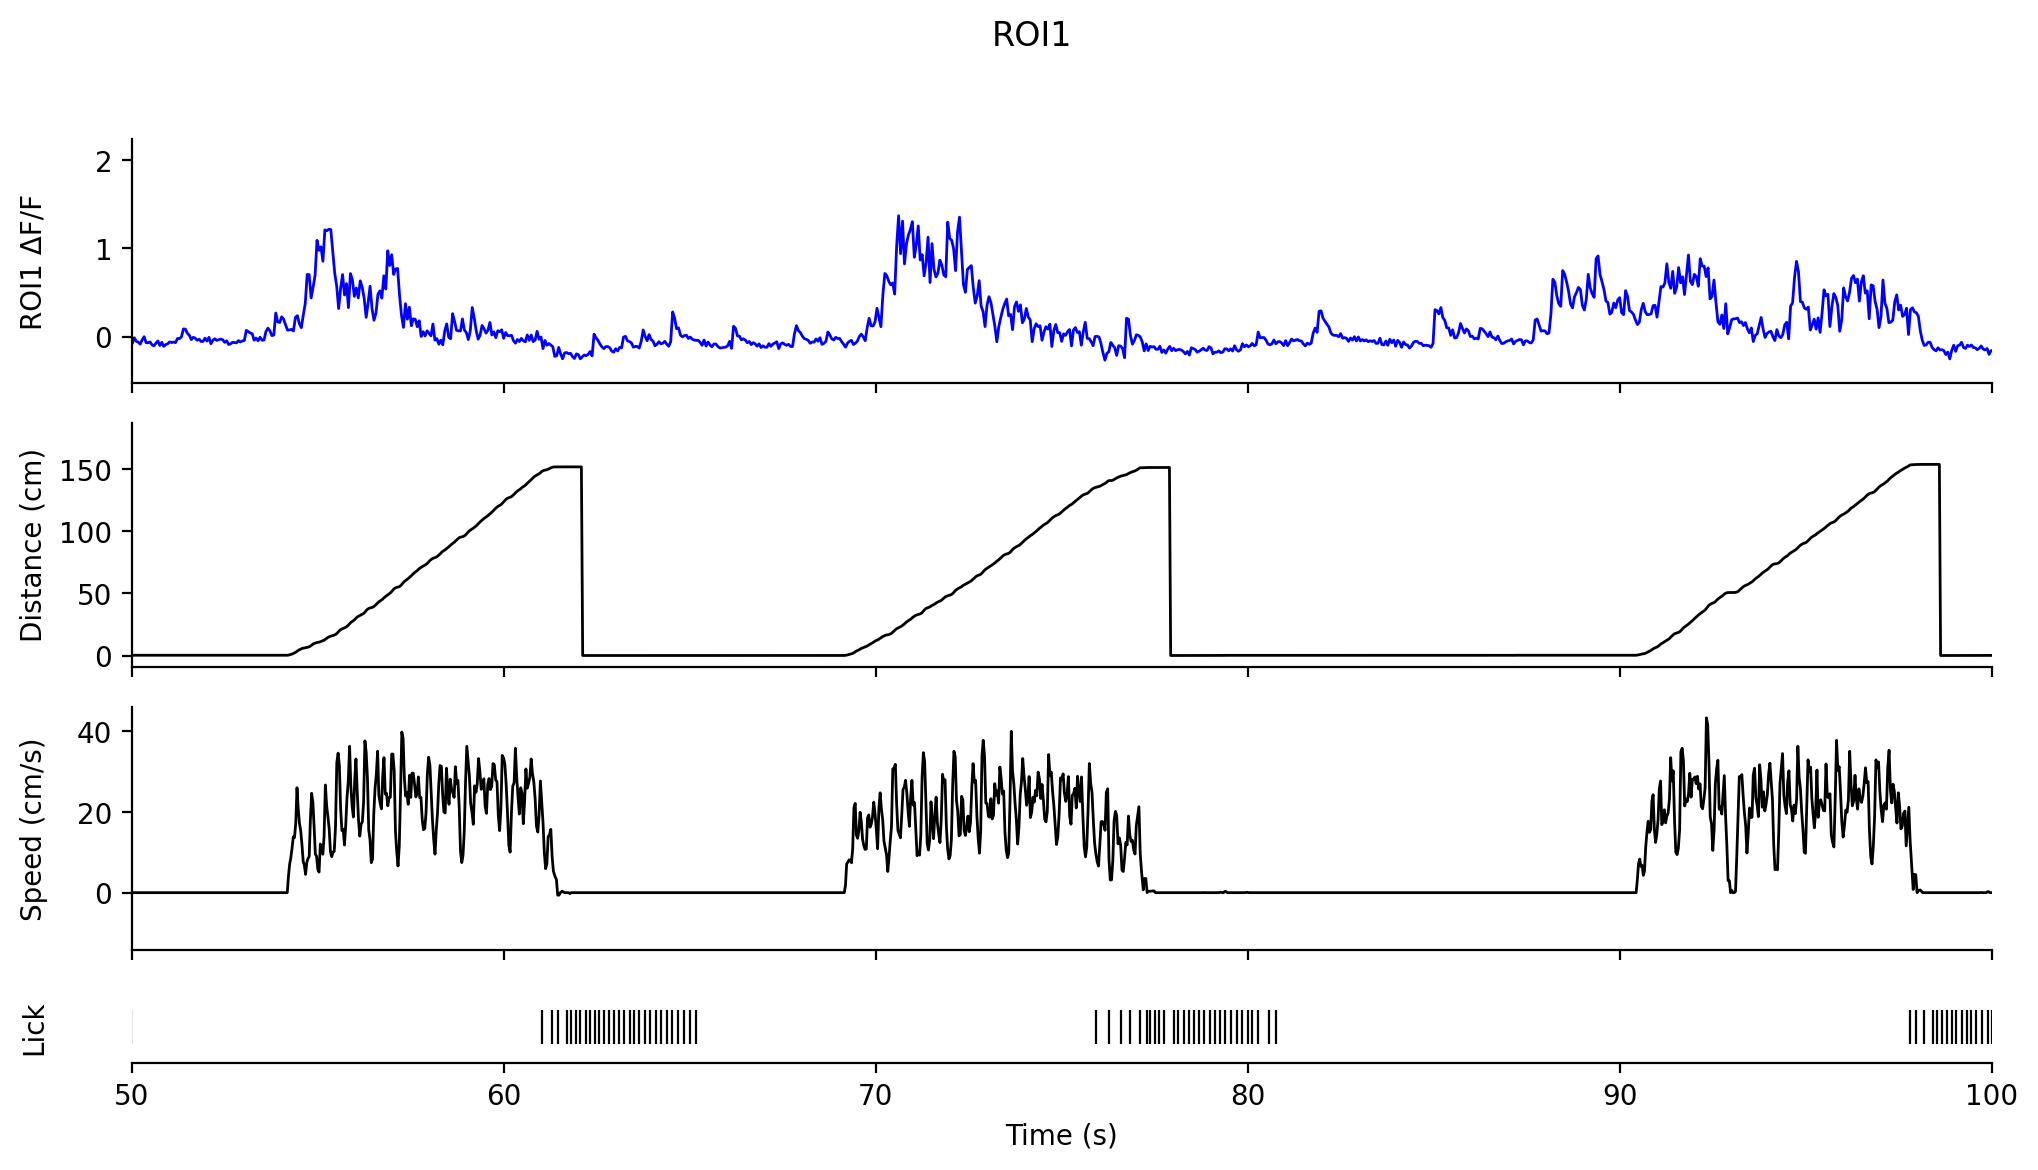

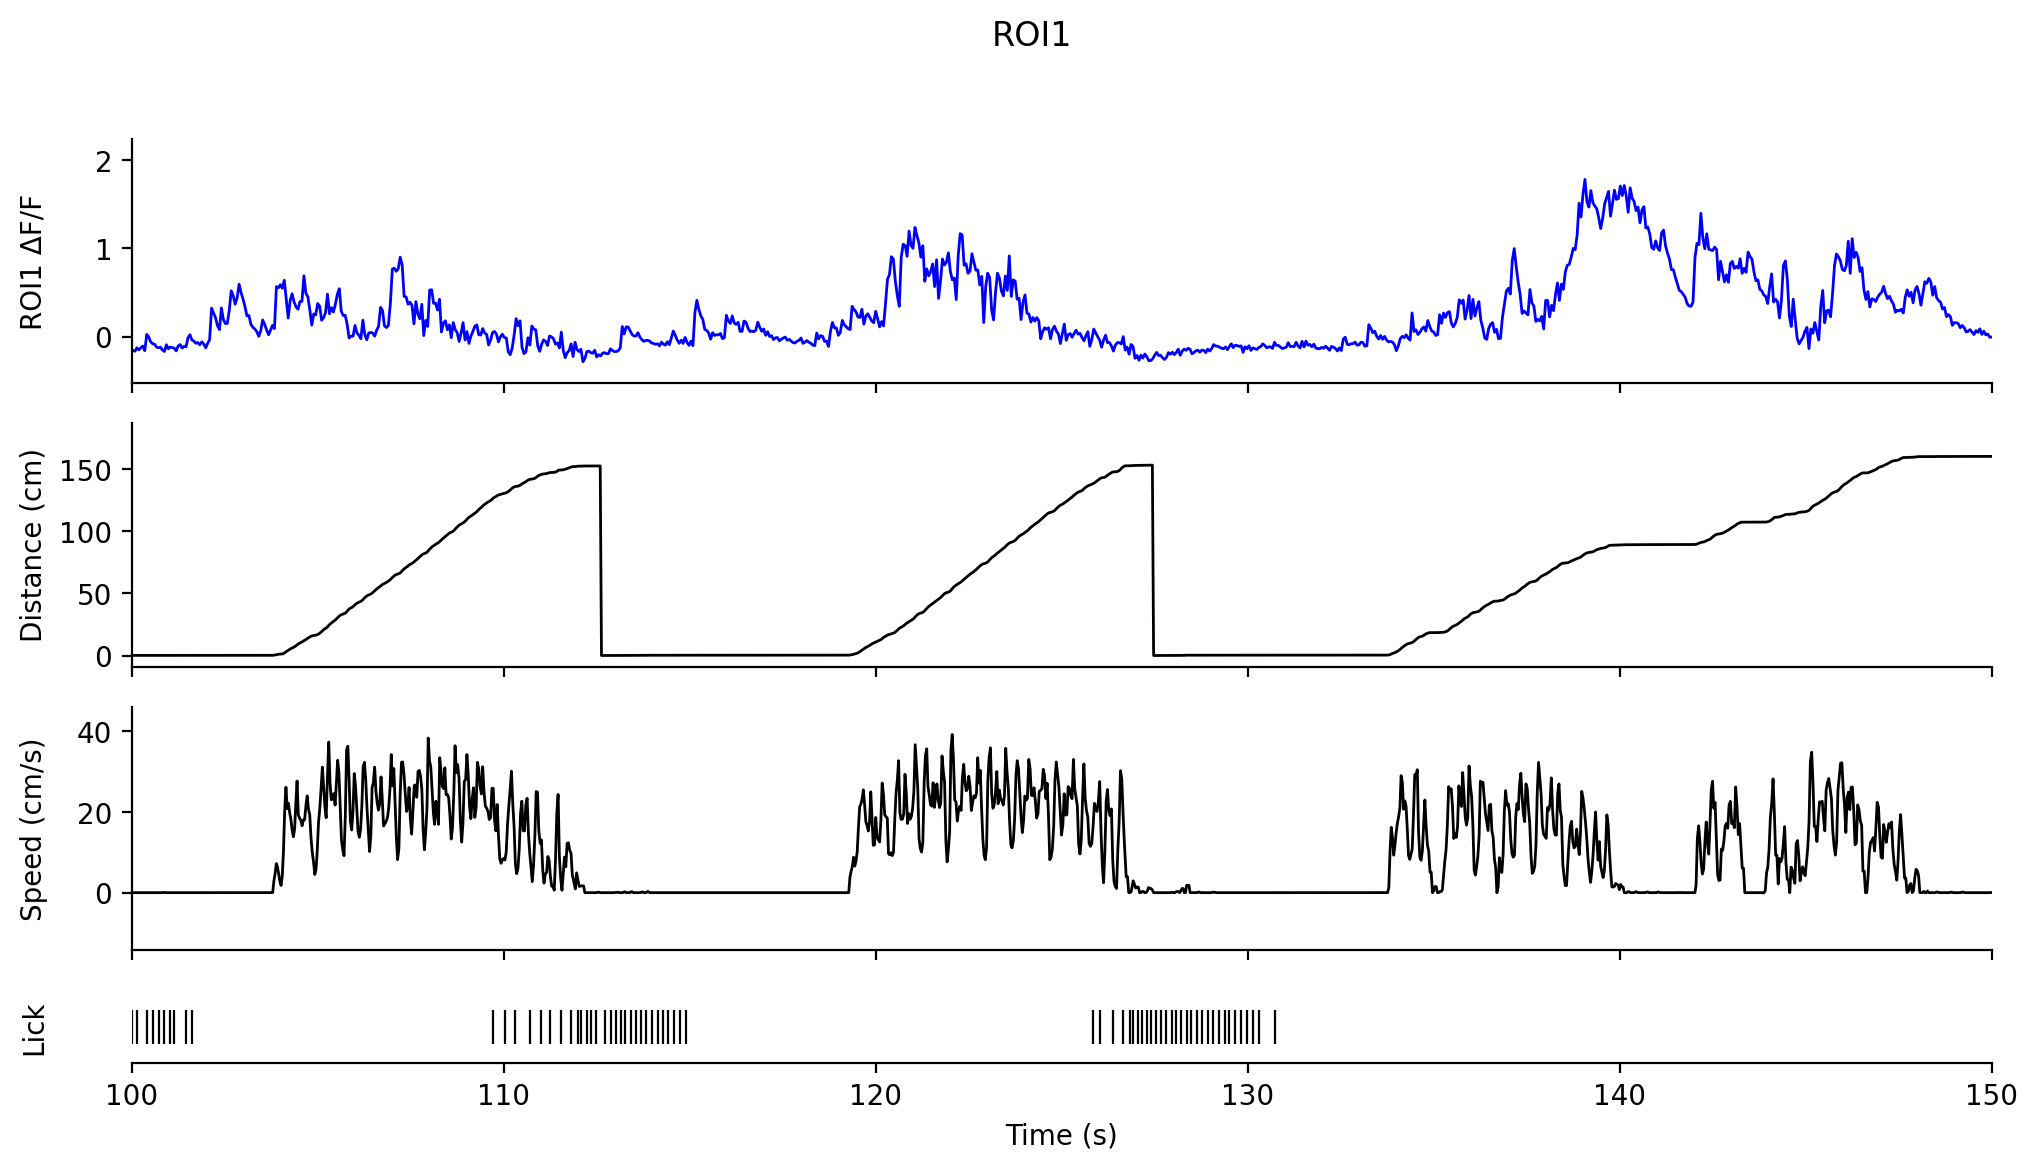

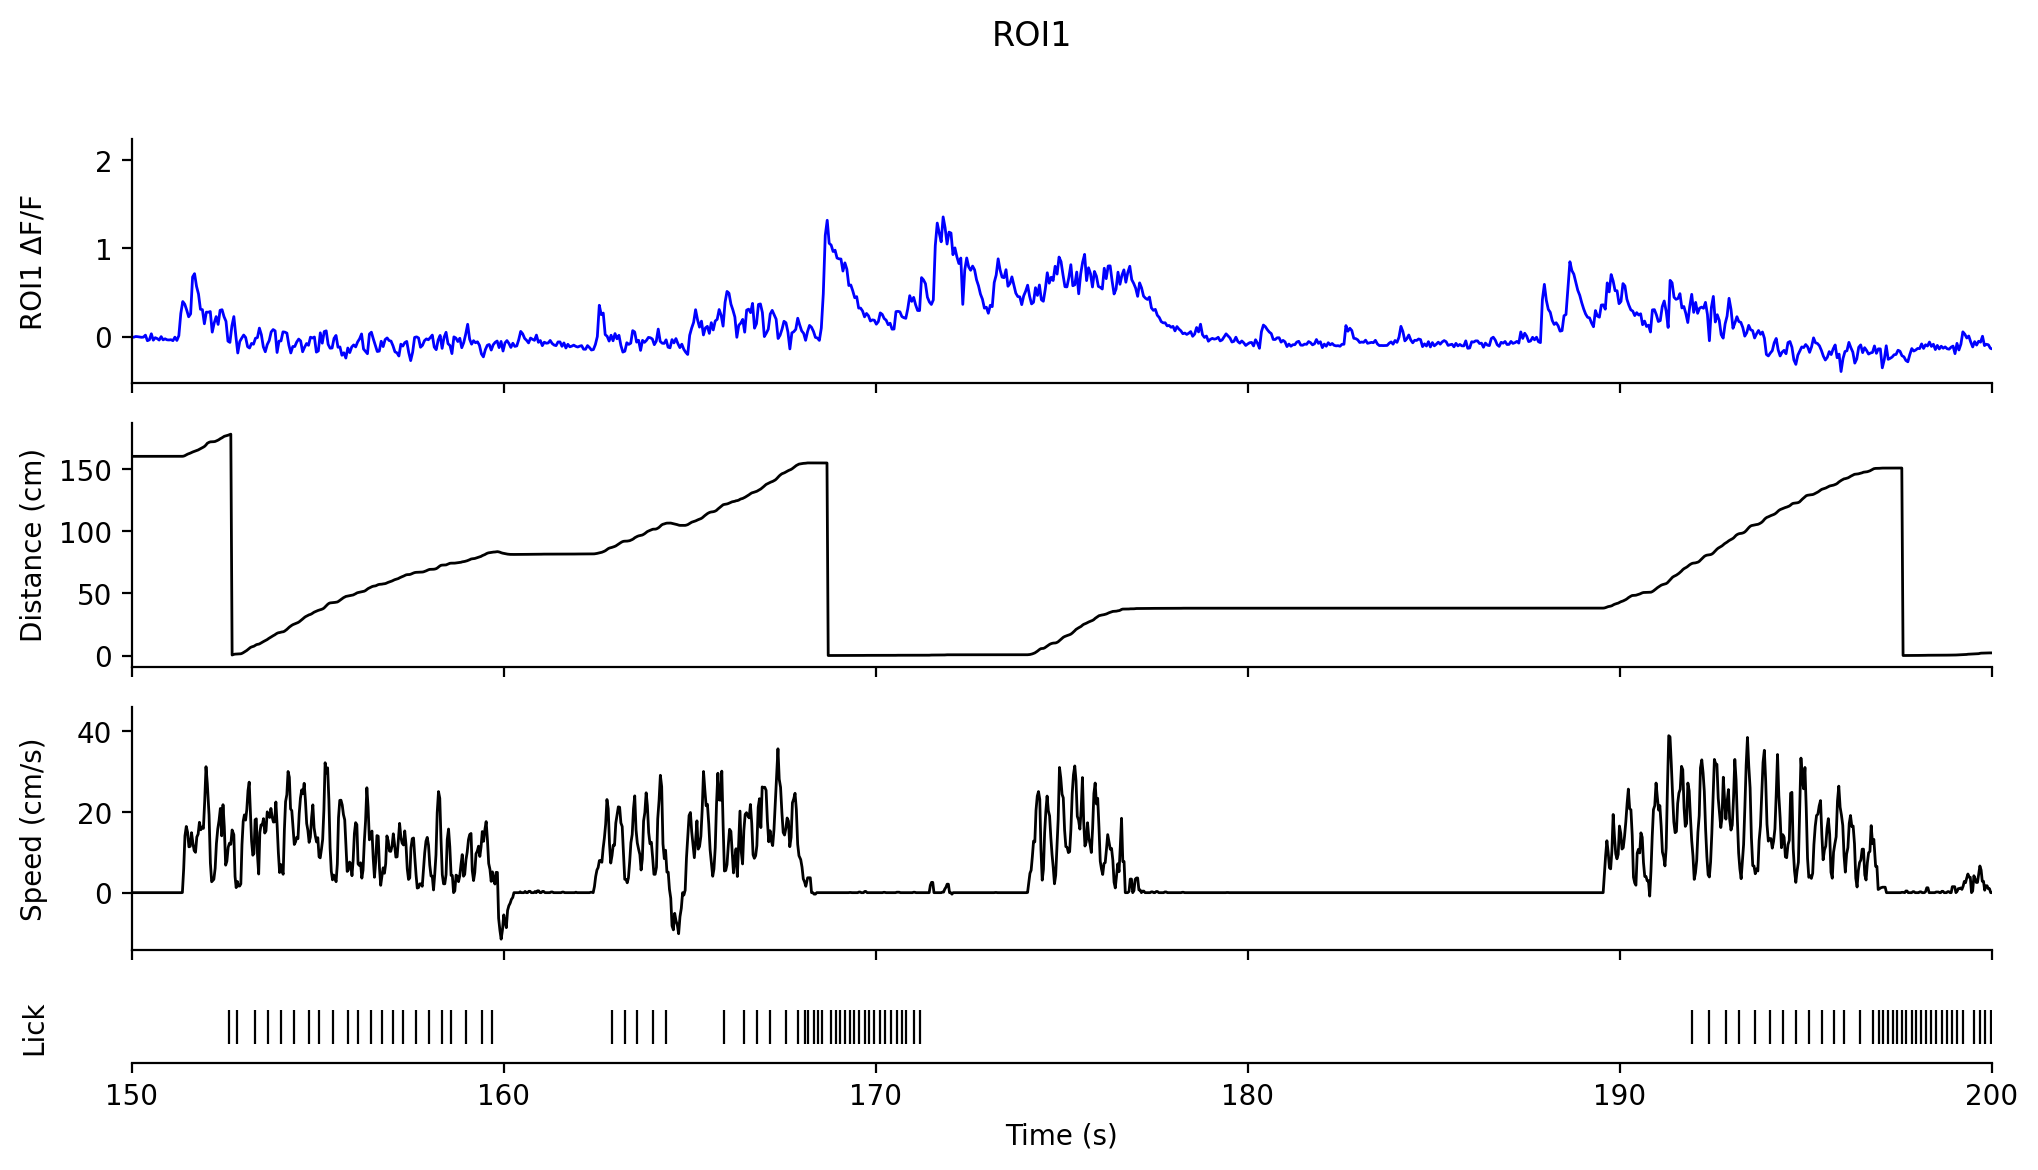

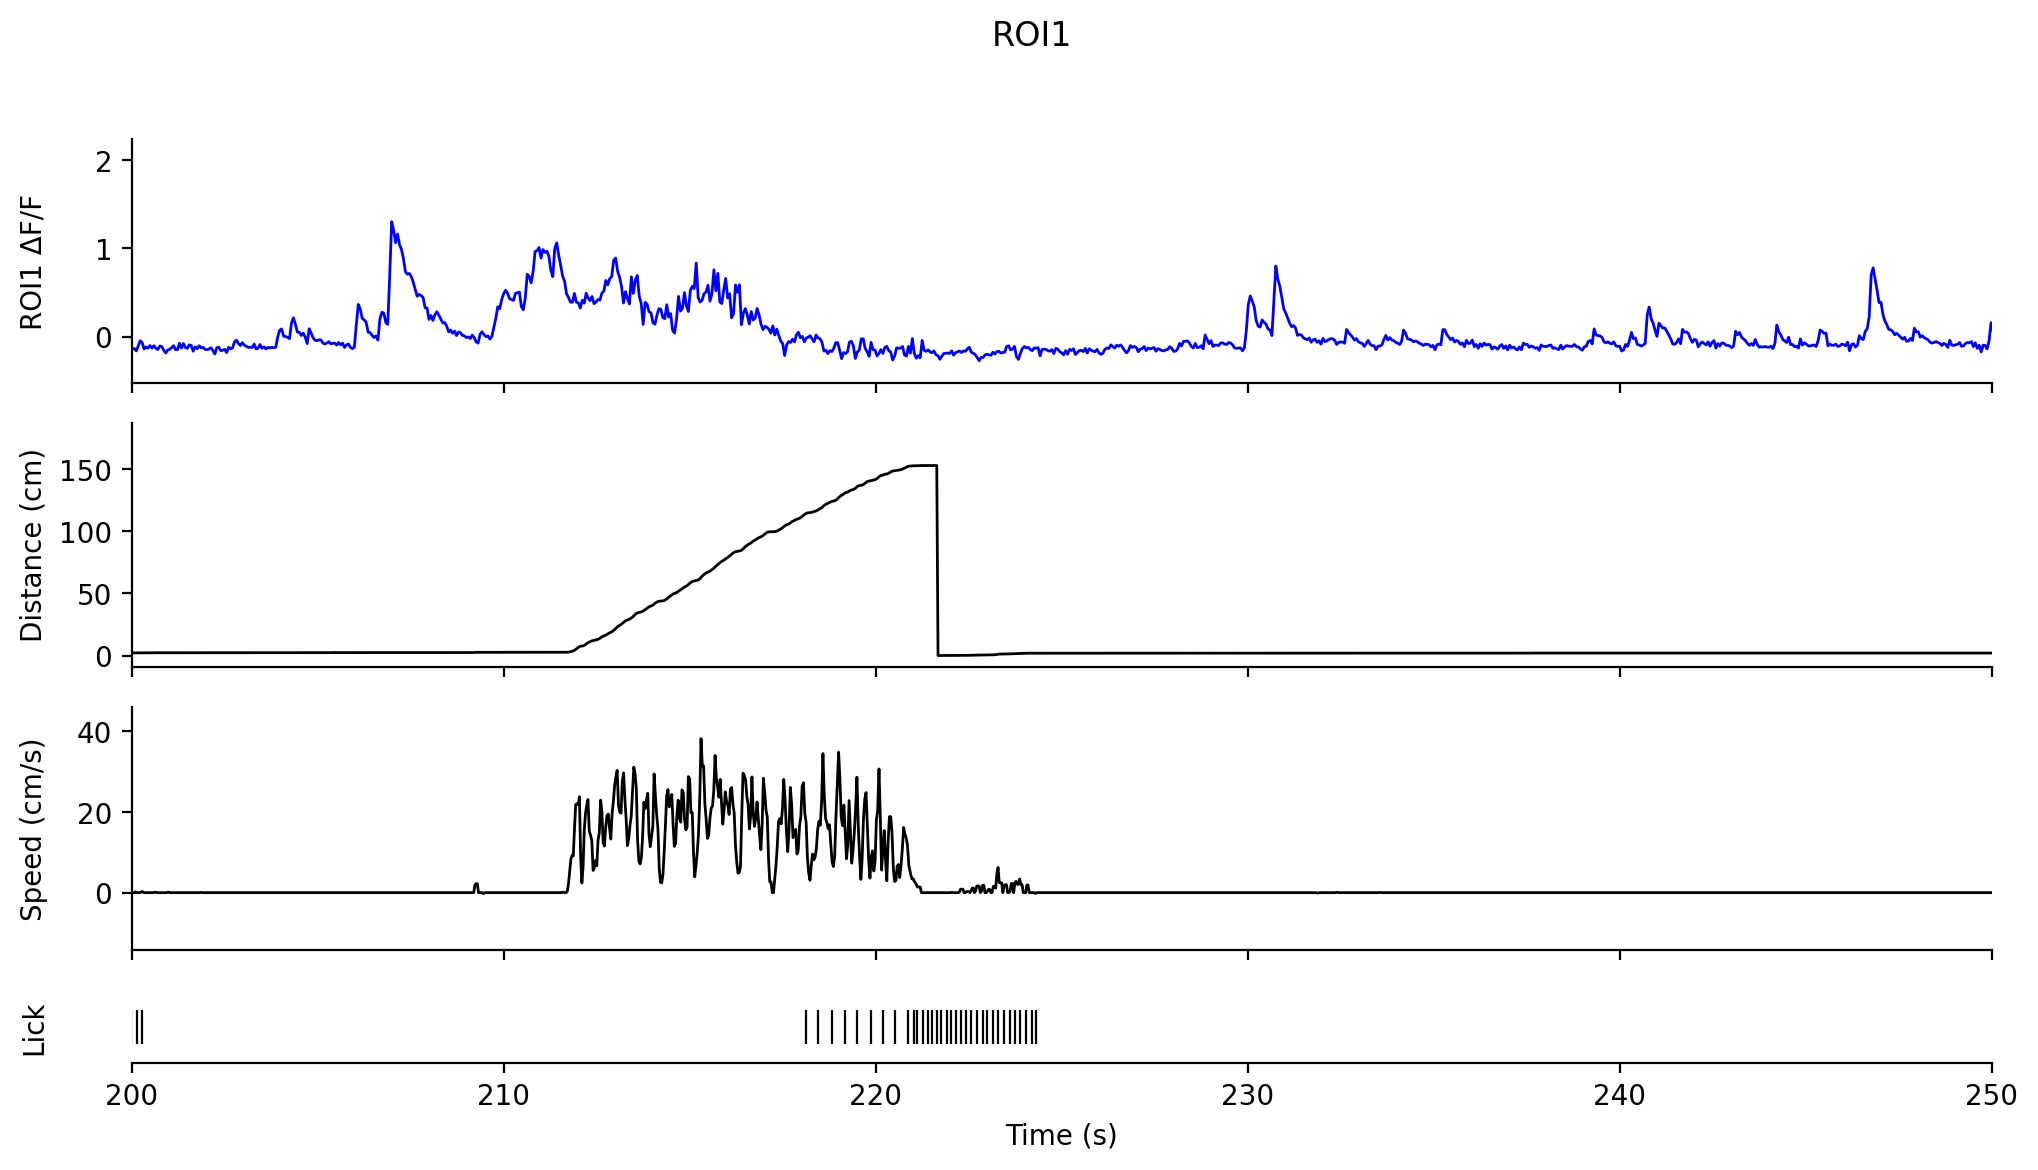

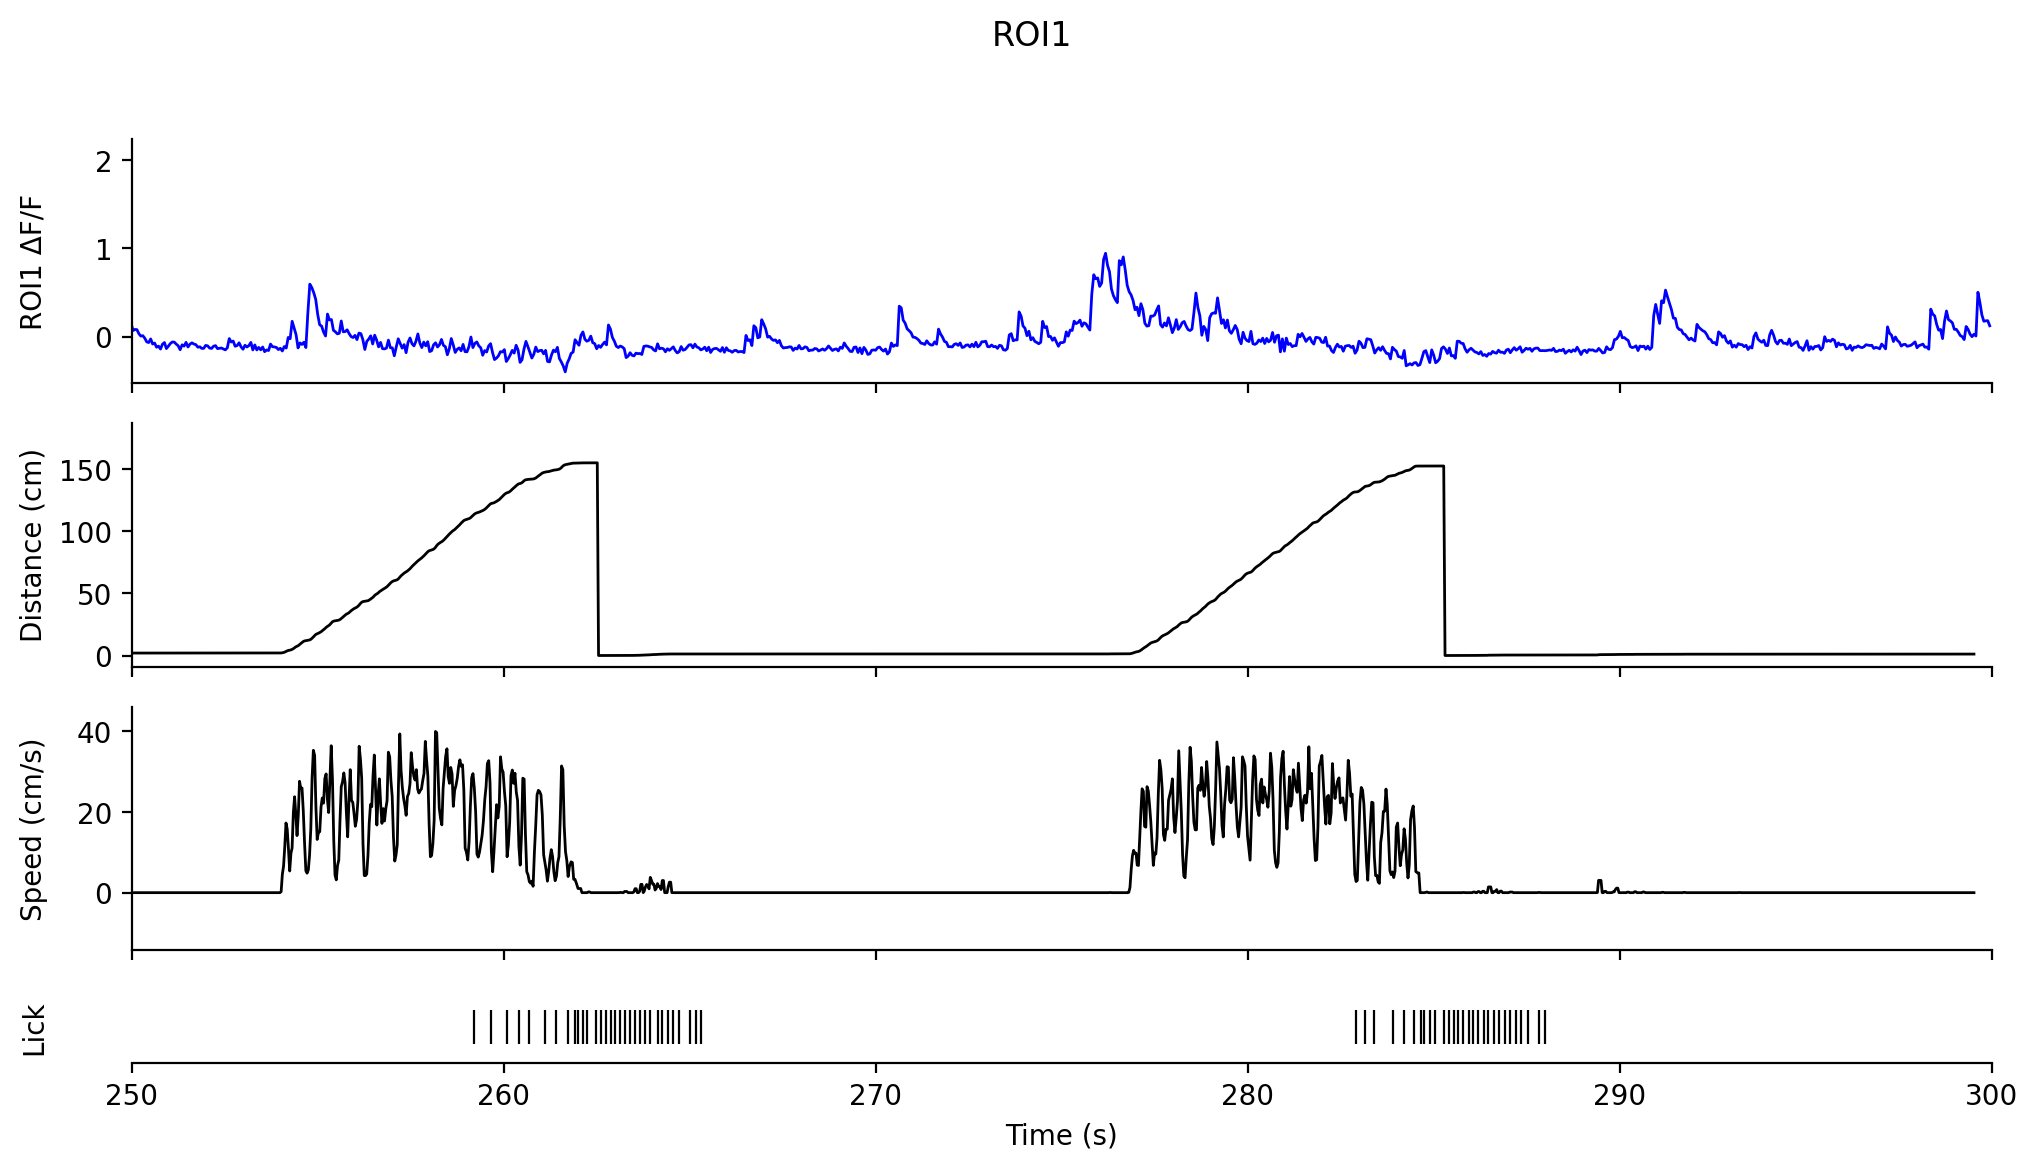

In [8]:
roi = "ROI1"

for i in range(0, 251, 50):
    fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 6), gridspec_kw={"height_ratios": [1, 1, 1, 0.3]})

    axes[0].plot(traces["Time"], traces[roi], lw=1.0, color="blue")
    axes[1].plot(behavior["Time"] / 1000, behavior["Distance"], lw=1.0, color="black")
    axes[2].plot(behavior["Time"] / 1000, behavior["Speed"], lw=1.0, color="black")
    # axes[3].plot(behavior["Time"] / 1000, lick_timing_continuous, lw=1.0, color="black")
    axes[3].eventplot(lick_timing_discrete, lw=0.8, color="black")

    axes[0].set_ylabel("ROI1 ΔF/F")
    axes[1].set_ylabel("Distance (cm)")
    axes[2].set_ylabel("Speed (cm/s)")
    axes[3].set_ylabel("Lick")

    axes[0].spines[["right", "top"]].set_visible(False)
    axes[1].spines[["right", "top"]].set_visible(False)
    axes[2].spines[["right", "top"]].set_visible(False)
    axes[3].spines[["left", "right", "top"]].set_visible(False)
    axes[3].set_yticks([])

    plt.xlim(i, i+50)
    plt.xlabel("Time (s)")
    fig.suptitle(roi)

    fig.align_ylabels(axes)

---

# All ROIs

In [9]:
output_dir = Path("../results/20230831/FOV2/")
os.makedirs(output_dir, exist_ok=True)

In [10]:
for roi in traces.columns[1:]:
    fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 6), gridspec_kw={"height_ratios": [1, 1, 1, 0.3]})

    axes[0].plot(traces["Time"], traces[roi], lw=0.4, color="blue")
    axes[1].plot(behavior["Time"] / 1000, behavior["Distance"], lw=0.4, color="black")
    axes[2].plot(behavior["Time"] / 1000, behavior["Speed"], lw=0.4, color="black")
    # axes[3].plot(behavior["Time"] / 1000, lick_timing_continuous, lw=0.5, color="black")
    axes[3].eventplot(lick_timing_discrete, lw=0.5, color="black")

    axes[0].set_ylabel("ΔF/F")
    axes[1].set_ylabel("Distance (cm)")
    axes[2].set_ylabel("Speed (cm/s)")
    axes[3].set_ylabel("Lick")

    axes[0].spines[["right", "top"]].set_visible(False)
    axes[1].spines[["right", "top"]].set_visible(False)
    axes[2].spines[["right", "top"]].set_visible(False)
    axes[3].spines[["left", "right", "top"]].set_visible(False)
    axes[3].set_yticks([])

    plt.xlabel("Time (s)")
    fig.suptitle(roi)

    fig.align_ylabels(axes)

    plt.savefig(output_dir/f"{roi}.png", bbox_inches="tight")
    plt.close()

---

In [11]:
selected = behavior[behavior["Speed"] > 2.0]
selected

,Trial_number,Time,Speed,Distance,Licking_count,Trial failed,Trail success,SLAP2_acquiring
80,25,2579.0,3.92,0.33,18.0,0.0,25.0,1.0
81,25,2611.0,7.62,0.58,18.0,0.0,25.0,1.0
82,25,2644.0,8.73,0.82,18.0,0.0,25.0,1.0
83,25,2676.0,8.35,1.11,18.0,0.0,25.0,1.0
84,25,2708.0,8.26,1.40,18.0,0.0,25.0,1.0
...,...,...,...,...,...,...,...,...
8532,38,284567.0,4.89,152.62,25.0,1.0,37.0,1.0
8533,38,284601.0,4.89,152.62,25.0,1.0,37.0,1.0
8681,39,289433.0,3.05,0.62,18.0,1.0,38.0,1.0
8682,39,289465.0,3.03,0.70,18.0,1.0,38.0,1.0


In [12]:
df_split = np.split(selected, np.where((0 > np.diff(selected.index)) | (np.diff(selected.index) > 15))[0]+1)  # 15 behavior data ~ 500 ms
print(len(df_split))

26


(-15.0, 60.0)

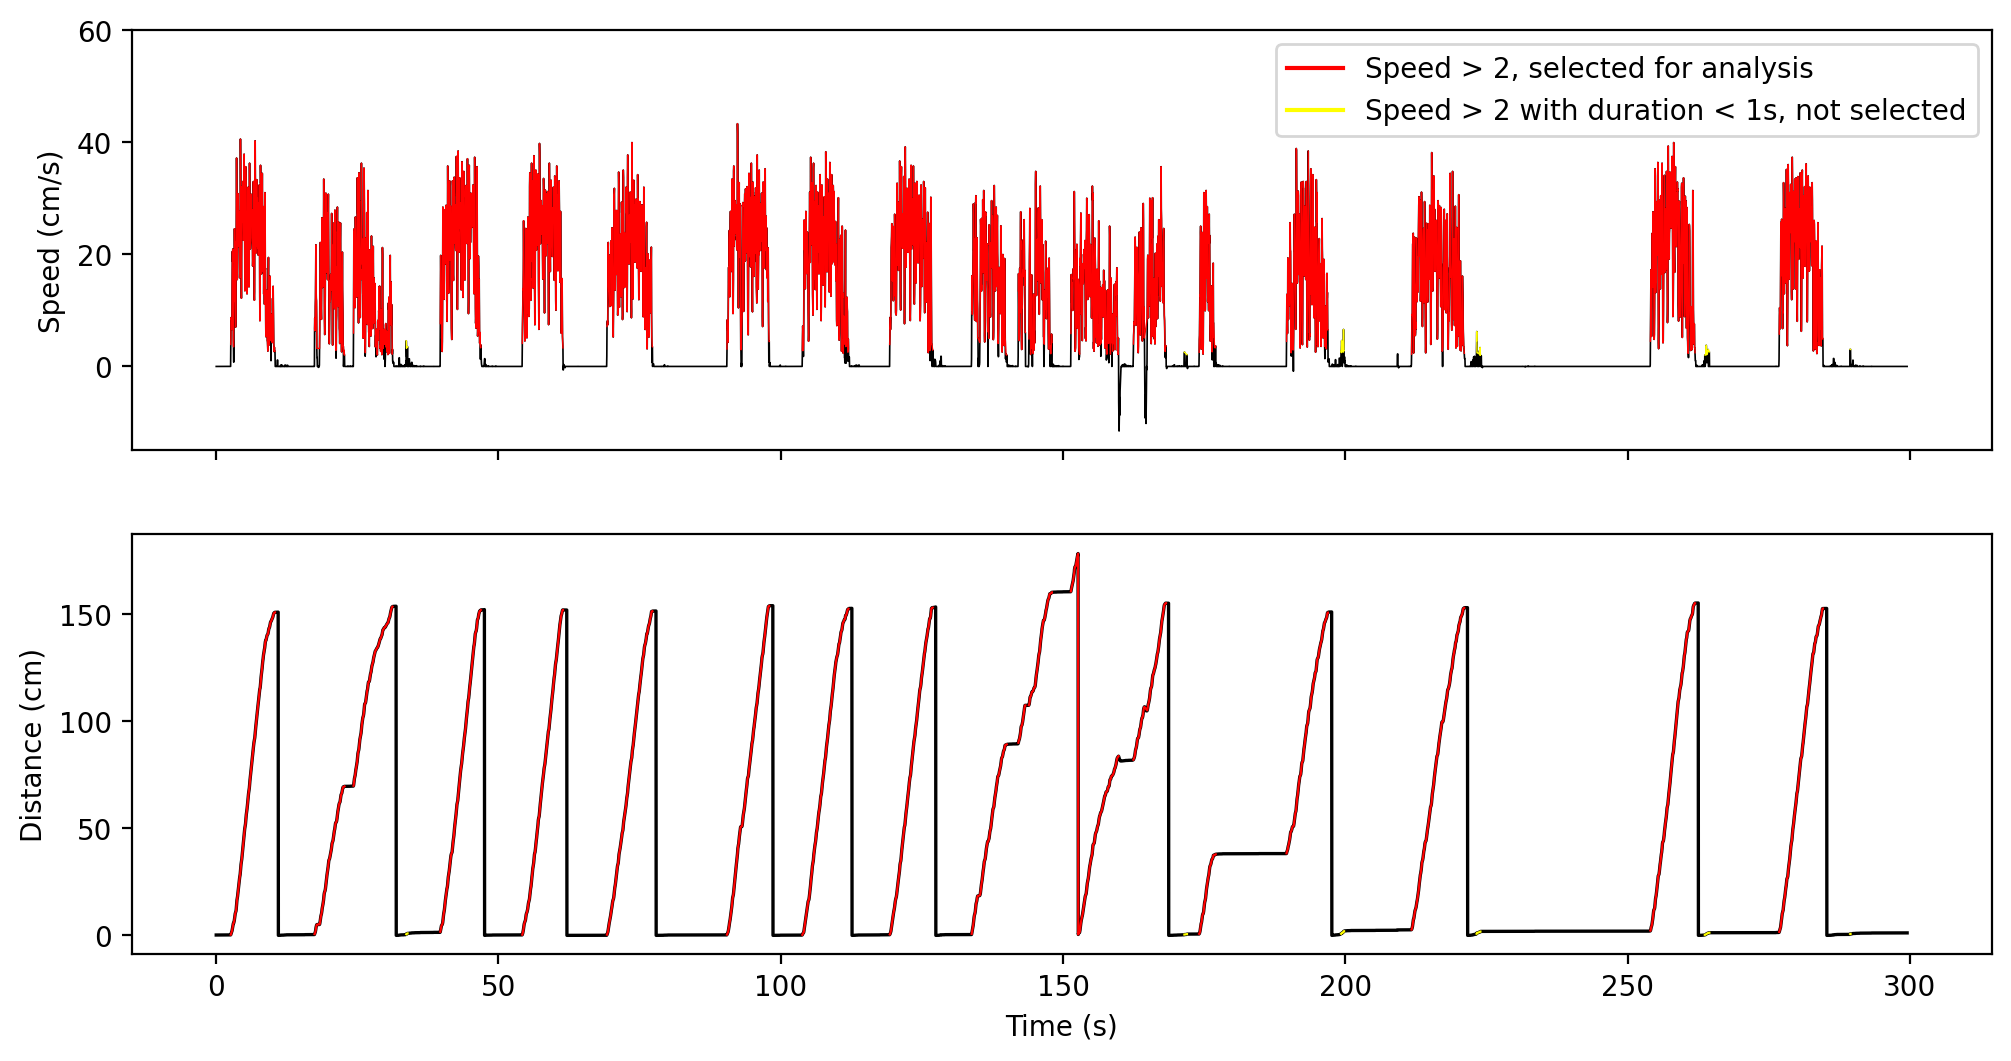

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axes[0].plot(behavior["Time"] / 1000, behavior["Speed"], color="black", lw=0.6)
axes[1].plot(behavior["Time"] / 1000, behavior["Distance"], color="black", lw=1.2)

for _df in df_split:
    duration = np.ptp(_df["Time"]) / 1000
    if duration > 1:
        axes[0].plot(_df["Time"] / 1000, _df["Speed"], color="red", lw=0.5)
        axes[1].plot(_df["Time"] / 1000, _df["Distance"], color="red", lw=0.8)
    else:
        axes[0].plot(_df["Time"] / 1000, _df["Speed"], color="yellow", lw=0.5)
        axes[1].plot(_df["Time"] / 1000, _df["Distance"], color="yellow", lw=0.8)

# plt.plot(behavior["Time"] / 1000, behavior["Trial failed"]*20)  ##########

plt.xlabel("Time (s)")
axes[0].set_ylabel("Speed (cm/s)")
axes[1].set_ylabel("Distance (cm)")
axes[0].plot([], [], color="red", label="Speed > 2, selected for analysis")
axes[0].plot([], [], color="yellow", label="Speed > 2 with duration < 1s, not selected")
axes[0].legend()
axes[0].set_ylim((-15, 60))

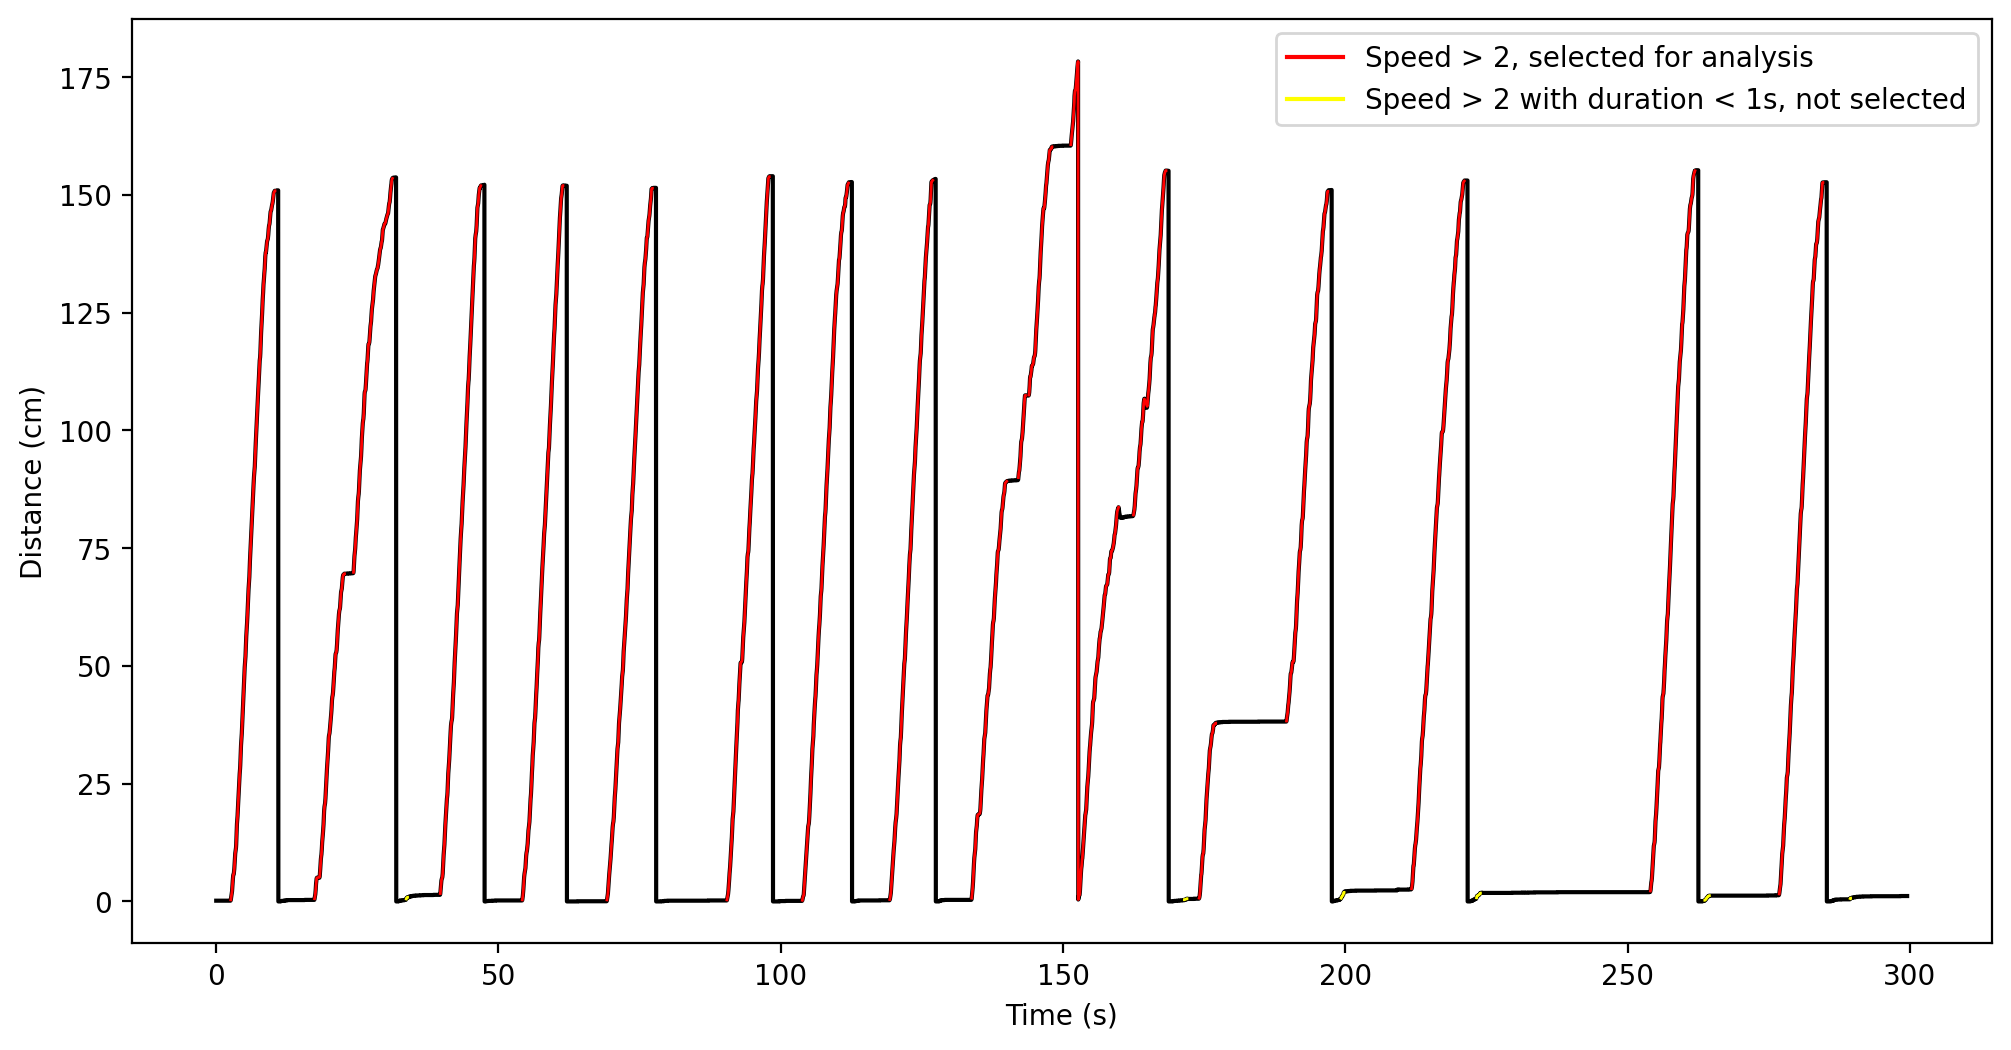

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(behavior["Time"] / 1000, behavior["Distance"], color="black")

for _df in df_split:
    duration = np.ptp(_df["Time"]) / 1000
    if duration > 1:
        plt.plot(_df["Time"] / 1000, _df["Distance"], color="red", lw=1.0)
    else:
        plt.plot(_df["Time"] / 1000, _df["Distance"], color="yellow", lw=1.0)


plt.xlabel("Time (s)")
plt.ylabel("Distance (cm)")
plt.plot([], [], color="red", label="Speed > 2, selected for analysis")
plt.plot([], [], color="yellow", label="Speed > 2 with duration < 1s, not selected")
plt.legend()

In [15]:
df_meet_criteria = []

for _df in df_split:
    duration = np.ptp(_df["Time"]) / 1000
    if duration > 1:
        df_meet_criteria.append(_df)

len(df_meet_criteria)

19

In [16]:
bin_size = 2  # cm
loc_range = (0, 150)
bin_locs = np.arange(loc_range[0]+bin_size/2, loc_range[1], bin_size)

Text(0.5, 1.0, 'ROI1 ΔF/F')

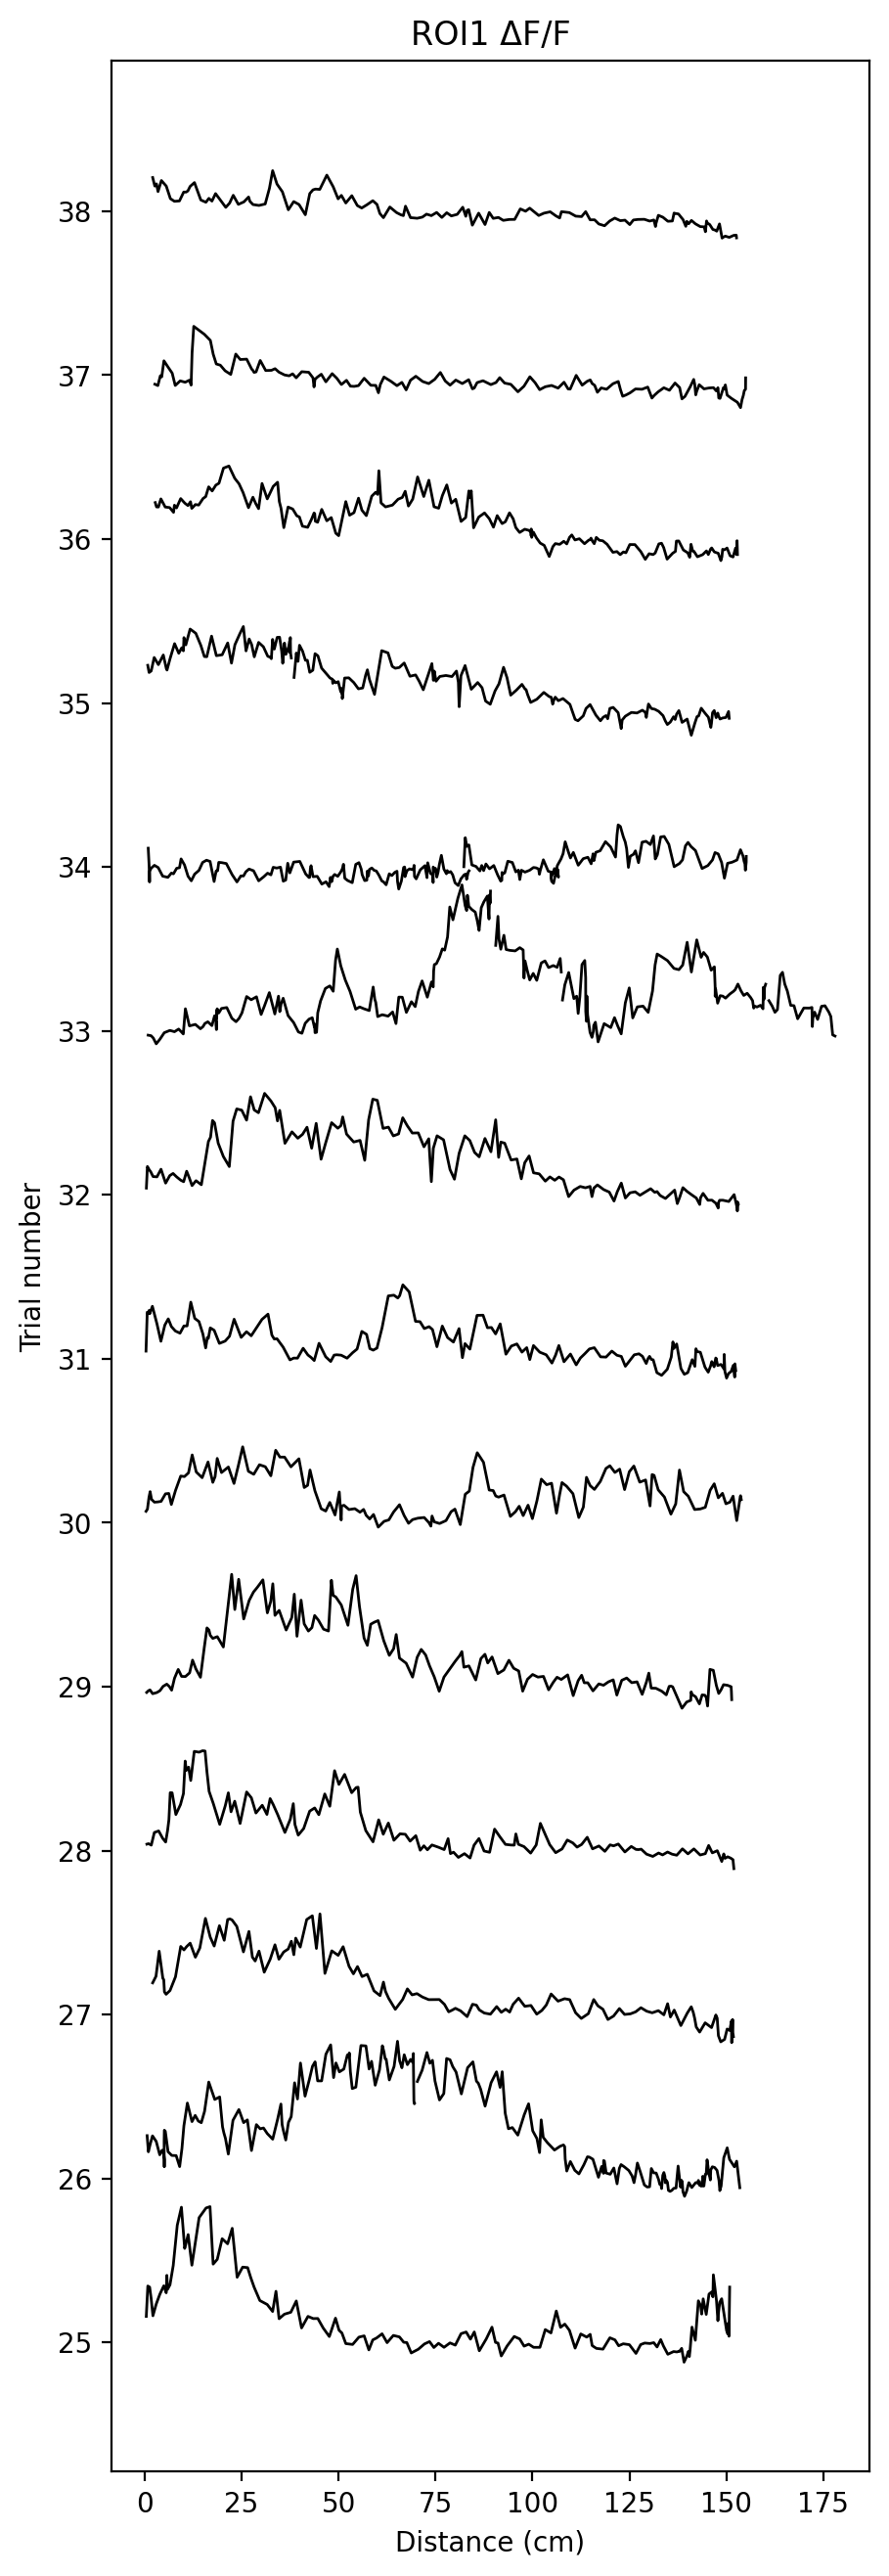

In [17]:
roi = "ROI1"

output = {}

plt.figure(figsize=(5, 16))
cmap = plt.get_cmap("tab20").colors
first_trial = 25

for _df in df_meet_criteria:
    grouped = _df.groupby("Trial_number")
    
    for (trial, grp) in grouped:
        start = grp["Time"].iat[0] / 1000
        end = grp["Time"].iat[-1] / 1000

        t_index = np.where((start < traces["Time"]) & (traces["Time"] < end))[0]
        t = traces["Time"][t_index]
        roi_activity = traces[roi][t_index]
        distance_interp = np.interp(t, behavior["Time"] / 1000, behavior["Distance"])

        plt.plot(distance_interp, roi_activity + trial*2, color="black", lw=1.0)  # plot, cmap[trial-first_trial]

        ##########

        for loc in bin_locs:
            idx_in_bin = np.where((loc-bin_size/2 <= distance_interp) & (distance_interp < loc+bin_size/2))[0]

            if (trial, loc) not in output:
                output[(trial, loc)] = []
            
            output[(trial, loc)] += list(roi_activity.iloc[idx_in_bin])


plt.yticks([i*2 for i in range(25, 39)], [i for i in range(25, 39)])
plt.xlabel("Distance (cm)")
plt.ylabel("Trial number")
plt.title(f"{roi} ΔF/F")

In [18]:
output

{(25, 1.0): [0.31665747, 0.68728194, 0.67327197, 0.54078516],
 (25, 3.0): [0.32418456, 0.4685631, 0.58695119],
 (25, 5.0): [0.69025197, 0.60464754, 0.81697954, 0.64743419],
 (25, 7.0): [0.70235301, 0.93696293],
 (25, 9.0): [1.4284249, 1.64871454],
 (25, 11.0): [1.14572877, 1.22214425, 1.31492671],
 (25, 13.0): [0.94125901],
 (25, 15.0): [1.52146801, 1.63905099],
 (25, 17.0): [1.65556999, 0.95429763],
 (25, 19.0): [1.01305782, 1.26422184],
 (25, 21.0): [1.20224521],
 (25, 23.0): [1.39128324, 0.79419326],
 (25, 25.0): [0.91780375],
 (25, 27.0): [0.91171498, 0.78671784],
 (25, 29.0): [0.67164786, 0.50979221],
 (25, 31.0): [0.46176494],
 (25, 33.0): [0.37628105, 0.62276647],
 (25, 35.0): [0.28828648],
 (25, 37.0): [0.34336791, 0.3672388],
 (25, 39.0): [0.50474732],
 (25, 41.0): [0.17539335],
 (25, 43.0): [0.31688234, 0.28992251],
 (25, 45.0): [0.29122207],
 (25, 47.0): [0.17517179, 0.0708099],
 (25, 49.0): [0.29482532],
 (25, 51.0): [0.14724856, 0.11408571, -0.01533171],
 (25, 53.0): [-0.0

In [19]:
from scipy.stats import sem

In [20]:
activity_mean = []
activity_std = []


for loc in bin_locs:
    activity_all_trials = [
        np.mean(output[(trial, loc)])
        for trial in pd.concat(df_meet_criteria)["Trial_number"].unique()
    ]

    print(activity_all_trials)

    activity_mean.append(np.nanmean(activity_all_trials))
    activity_std.append(sem(activity_all_trials, nan_policy="omit"))

activity_mean = np.array(activity_mean)
activity_std = np.array(activity_std)

[0.554499135, 0.41867106000000004, nan, 0.07605129, -0.05399482666666666, 0.255247156, 0.499087485, 0.254247485, -0.05547968, -0.001872233999999998, 0.40799962333333334, nan, nan, nan]
[0.4598996166666667, 0.41936256666666666, 0.54119461, 0.22978162000000002, -0.06935071666666666, 0.25189477, 0.42574134, 0.221191935, -0.11587022666666667, 0.006320595, 0.512151875, 0.41004323000000004, -0.118384445, 0.32316319250000003]
[0.68982831, 0.31942258166666665, 0.38846422199999997, 0.16594607000000003, 0.01666455, 0.30639034499999995, 0.31207739, 0.22764434, -0.02188116, -0.11916487, 0.4693220566666667, 0.441026195, 0.0620398875, 0.341070835]
[0.81965797, 0.30286309499999997, 0.37618947999999997, 0.59547359, 0.0195577, 0.324578, 0.4061168566666667, 0.247744405, -0.0019407199999999995, -0.07900067999999999, 0.6328842299999999, 0.37500103333333334, -0.050274000000000006, 0.137501065]
[1.53856972, 0.26248899, 0.83043345, 0.5651210299999999, 0.16735508, 0.56907004, 0.31196065, 0.19898538999999998, 

/home/pei/.pyenv/versions/3.11.2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pei/.pyenv/versions/3.11.2/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'ΔF/F')

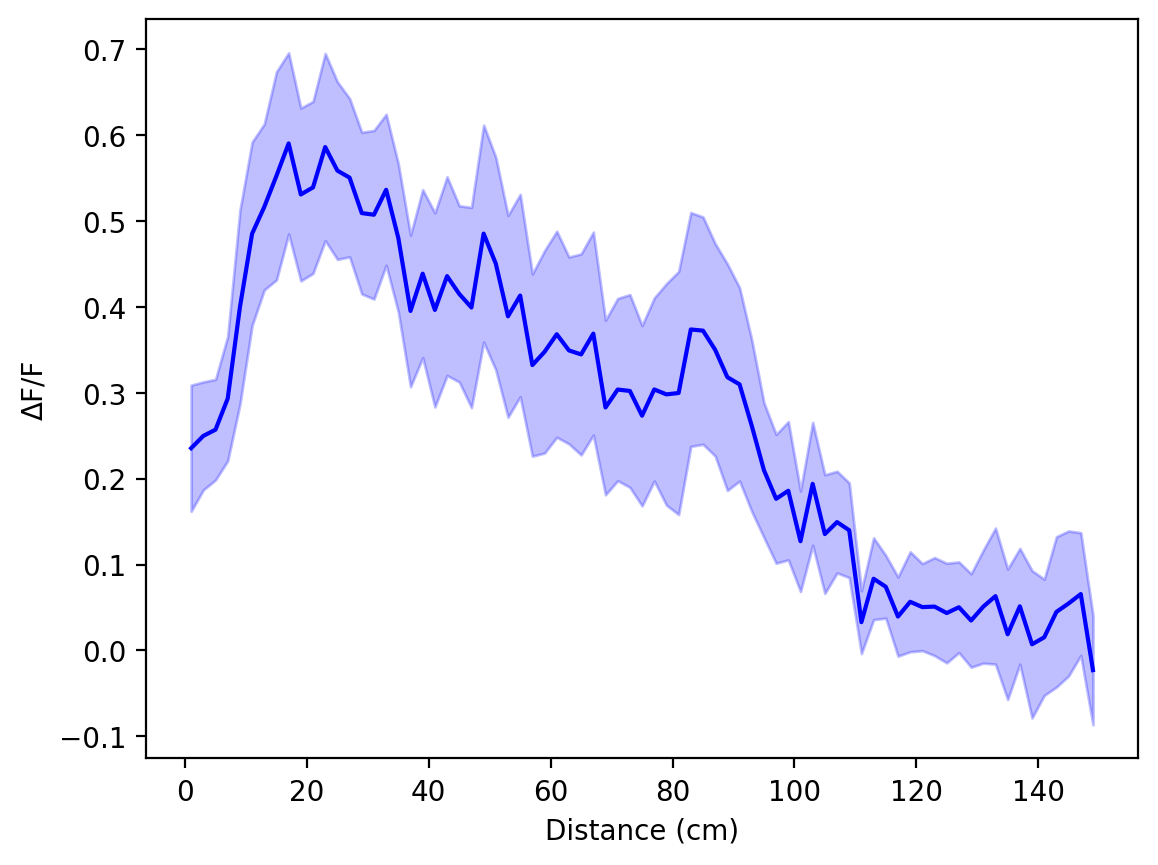

In [21]:
plt.fill_between(x=bin_locs,
                 y1=activity_mean - activity_std,
                 y2=activity_mean + activity_std,
                 alpha=0.25, color="blue"
                 )
plt.plot(bin_locs, activity_mean, color="blue")
plt.xlabel("Distance (cm)")
plt.ylabel("ΔF/F")